Note that the magnet distance was changed from 38 mm to 21 mm before this measurement, but the temperature was not brought above the niobium critical temperature until later.

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-06-11_013928_sweep_stream.nc')

In [4]:
print(ncf.metadata.script_code)

"""
Measure one resonator per LO frequency. Since each measurement has only one channel, record SingleSweepStreams.
"""
import time

import numpy as np
try:
    from tqdm import tqdm as progress
except ImportError:
    progress = list

from kid_readout.roach import hardware_tools, analog
from kid_readout.measurement import acquire, basic
from kid_readout.equipment import hardware
from kid_readout.settings import CRYOSTAT
if CRYOSTAT.lower() == 'hpd':
    from kid_readout.equipment import hpd_temps as temps
elif CRYOSTAT.lower() == 'starcryo':
    from kid_readout.equipment import starcryo_temps as temps
else:
    raise ValueError("Unknown cryostat: {}".format(repr(CRYOSTAT)))

# Parameters
f0_MHz = np.array([2432, 3488, 3629, 3800])
num_offsets = 100
span_MHz = 10
minimum_MHz = 10
round_to_MHz = 2
lo_MHz = round_to_MHz * np.round((f0_MHz - span_MHz / 2 - minimum_MHz) / round_to_MHz)
offsets_MHz = np.linspace(minimum_MHz, minimum_MHz + span_MHz, num_offsets)
num_tone_samples = 2**19
swe

In [5]:
ss = [ncf.read(name) for name in ncf.node_names()]

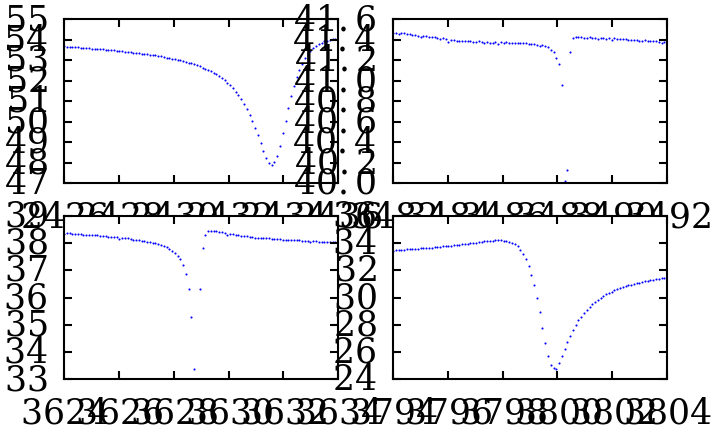

In [6]:
fig, axes = plt.subplots(2, 2)
for s, ax in zip(ss, axes.flatten()):
    ax.plot(s.sweep.frequency_MHz, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=1)

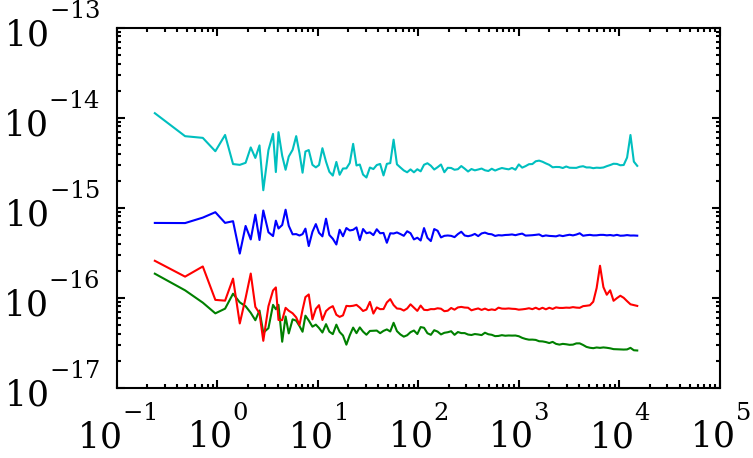

In [7]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

for s in ss:
    ax.plot(s.S_frequency, s.S_xx)

In [8]:
best = ss[1]

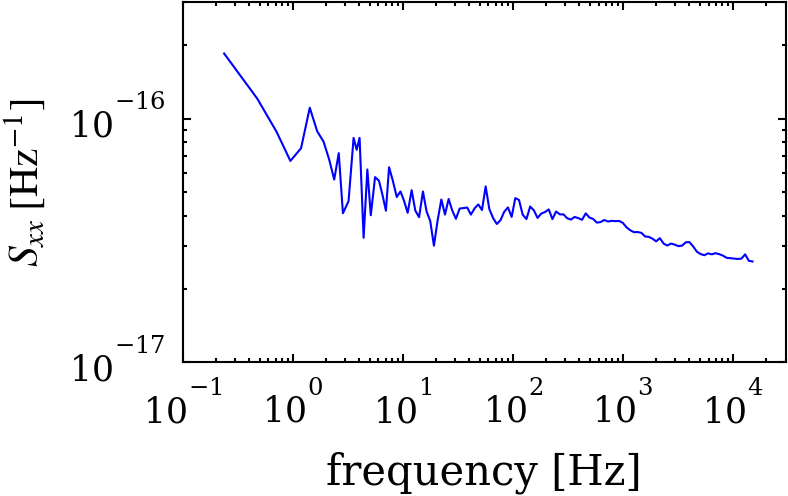

In [20]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('$S_{xx} \; [\mathrm{Hz}^{-1}]$')

ax.plot(best.S_frequency, best.S_xx, label='')
#ax.plot(best.S_frequency, best.S_yy, label='$S_{yy}$')
#ax.plot(best.pca_S_frequency, best.pca_S_11)
#ax.plot(best.pca_S_frequency, best.pca_S_00)

ax.set_xlim(1e-1, 3e4)
ax.set_ylim(1e-17, 3e-16)
#ax.legend(loc='upper right')
fig.savefig('/home/flanigan/temp/twolayer01-0306_best_noise_2016-06-13_rebinned_Sxx_only.pdf')

In [10]:
# sent to Brad 2016-06-12
#np.savetxt('/home/flanigan/temp/x.txt', best.x, fmt='%.16e')
#np.savetxt('/home/flanigan/temp/y.txt', best.y, fmt='%.16e')

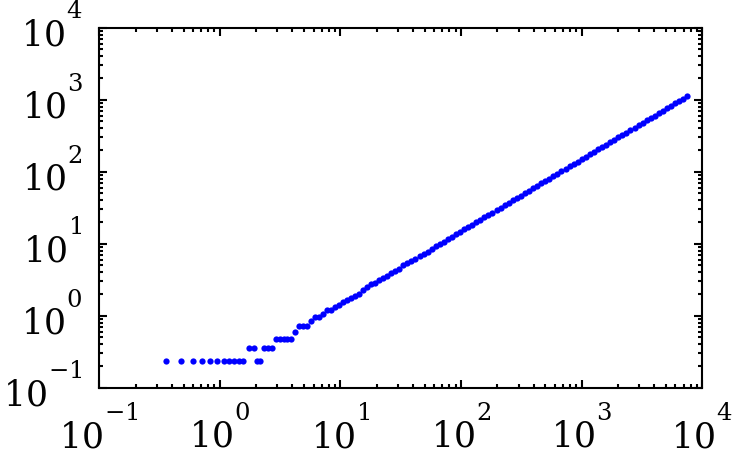

In [11]:
fig, ax = plt.subplots()

ax.loglog((best.S_frequency[1:] + best.S_frequency[:1]) / 2, np.diff(best.S_frequency),'.')


In [12]:
best.S_frequency[:10]

array([ 0.23841858,  0.47683716,  0.71525574,  0.95367432,  1.1920929 ,
        1.43051147,  1.66893005,  1.90734863,  2.14576721,  2.38418579])

In [13]:
best.S_xx[:10]

array([  1.85195895e-16,   1.20920764e-16,   8.82801661e-17,
         6.71017179e-17,   7.56917762e-17,   1.10960761e-16,
         8.88940470e-17,   8.05370081e-17,   6.80760959e-17,
         5.62764659e-17])